## Sanjay Santokee - sanjay.santokee@my.uwi.edu

In [1]:
%load_ext autoreload
%autoreload 2

#### Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso,LinearRegression, Ridge
from sklearn.model_selection import train_test_split, KFold

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading in the encoded data

In [3]:
X = []
y = []

with open('X.npy', 'rb') as fp:
    X = np.load(fp)
with open('y.npy', 'rb') as fp:
    y = np.load(fp)

#### MAPE Metric Function to Evaluate Model's Performance

In [4]:
def mape(actual, predicted):
    diff = np.abs(actual - predicted)
    factor = diff / actual
    return np.mean(factor) * 100

#### KFold with 5 folds

In [5]:
k_fold = KFold(n_splits=5)
k_fold.get_n_splits(X)

5

#### Fitting and Calculating MAPE for Linear, LASSO and Ridge Regression

In [6]:
lin_reg_mape = []
lasso_reg_mape = []
ridge_reg_mape = []

for train_index, test_index in k_fold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linearReg = LinearRegression()
    linearReg.fit(X_train, y_train)
    linear_reg_y_pred = linearReg.predict(X_test)
    
    lassoReg = Lasso(alpha=0.3, normalize=True)
    lassoReg.fit(X_train, y_train)
    lasso_y_pred = lassoReg.predict(X_test)
    
    ridgeReg = Ridge(alpha=0.3, normalize=True)
    ridgeReg.fit(X_train,y_train)
    ridge_y_pred = ridgeReg.predict(X_test)
    
    lin_reg_mape.append(mape(y_test, linear_reg_y_pred))
    lasso_reg_mape.append(mape(y_test, lasso_y_pred))
    ridge_reg_mape.append(mape(y_test, ridge_y_pred))

    
lin_reg_mape = np.array(lin_reg_mape)
lasso_reg_mape = np.array(lasso_reg_mape)
ridge_reg_mape = np.array(ridge_reg_mape)

#### Calculating the Mean and Standard Deviation of Each Model

In [7]:
performance_df = pd.DataFrame(columns=['Model', 'Average MAPE Score', 'Standard Deviation of MAPE'])

performance_df = performance_df.append({'Model': 'Linear Regression', 'Average MAPE Score': np.mean(lin_reg_mape), 'Standard Deviation of MAPE': np.std(lin_reg_mape)},  ignore_index=True)
performance_df = performance_df.append({'Model': 'LASSO Regression', 'Average MAPE Score': np.mean(lasso_reg_mape), 'Standard Deviation of MAPE': np.std(lasso_reg_mape)},  ignore_index=True)
performance_df = performance_df.append({'Model': 'Ridge Regression', 'Average MAPE Score': np.mean(ridge_reg_mape), 'Standard Deviation of MAPE': np.std(ridge_reg_mape)},  ignore_index=True)

performance_df

,Model,Average MAPE Score,Standard Deviation of MAPE
0,Linear Regression,37.044293,9.050566
1,LASSO Regression,40.781990,11.231119
2,Ridge Regression,50.600446,15.014052


#### Visualizing Results

In [8]:
sns.set(style="darkgrid")
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("bright"))

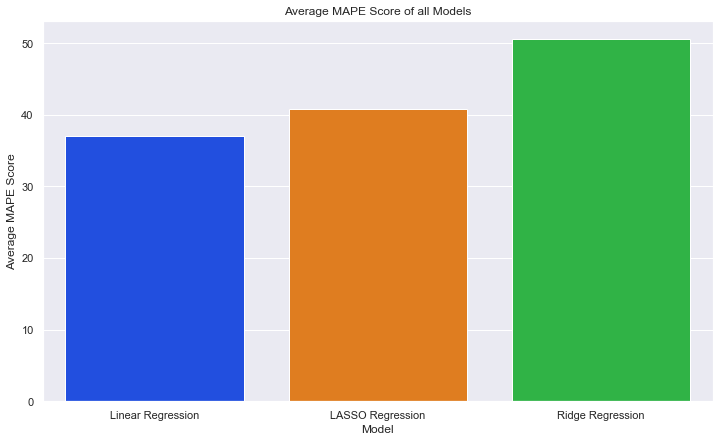

In [9]:
plt.figure(figsize=(12, 7))
plt.title("Average MAPE Score of all Models")
ax = sns.barplot(x="Model", y="Average MAPE Score", data=performance_df)
plt.xlabel("Model")
plt.ylabel("Average MAPE Score")
plt.show(ax)

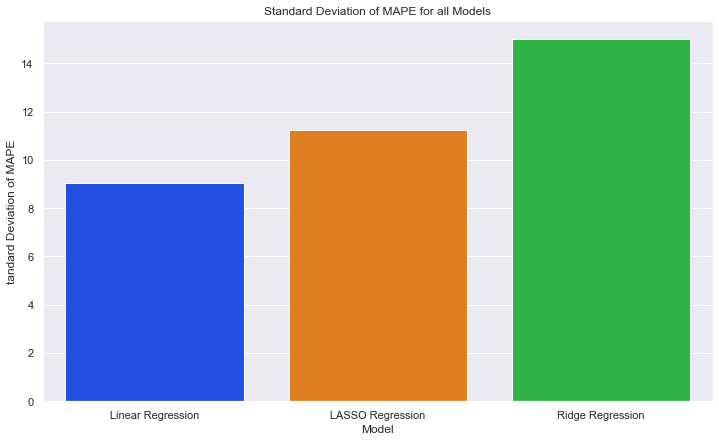

In [10]:
plt.figure(figsize=(12, 7))
plt.title("Standard Deviation of MAPE for all Models")
ax = sns.barplot(x="Model", y="Standard Deviation of MAPE", data=performance_df)
plt.xlabel("Model")
plt.ylabel("tandard Deviation of MAPE")
plt.show(ax)